# This notebook generates a wordcloud based on tool statistics (i.e. how many users used this tool during a specific) for a galaxy community. 

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('display.width', 1000)

### Get usage data from a galaxy admin with

Tool usage since X:

```
select regexp_replace(tool_id, '(.*)/(.*)', '\1') as tool_name, count(*) from job where create_time >= '2022-01-01 00:00:00.000000' group by tool_name
```

In [13]:
# Inspect the data

tool_usage = "../data/tool_usage_since_2022.csv" #all usages in that time
tool_usage = "../data/tool_usage_per_people_2022.csv" #all people that used that tool in that time

df = pd.read_csv(tool_usage)
df.sort_values('count', ascending=False, inplace=True)

print(df.to_string())

                                                                                                                                            tool_name  count
1035                                                                                                                                   __DATA_FETCH__  28676
2600                                                                                               toolshed.g2.bx.psu.edu/repos/devteam/fastqc/fastqc  17447
392                                                                                                  toolshed.g2.bx.psu.edu/repos/iuc/multiqc/multiqc   8320
978                                                                                                                                  __SET_METADATA__   7566
742                                                                                                                      CONVERTER_gz_to_uncompressed   7022
1490                                                      

# Extract the tool stats

The tool id is hidden in the toolshed url, the last position is the actual tool id, the second last can be the tool suite or the tool_id as well,
in some cases the tools selected for a community are based on the suite rather then the tool_id, in this case the second option should be used,
in general I would rerecommendo always match the actual tool_ids

In [29]:
def get_last_url_position(val):
    val = val.split("/")[-1]
    return(val)

def get_secondlast_url_position(val):
    if len(val.split("/")) == 1:
        return(val)
    else:
        val = val.split("/")[-2]
    return(val)

df["last_pos"] = df["tool_name"].apply(get_last_url_position)
df["secondlast_pos"] = df["tool_name"].apply(get_secondlast_url_position)

# especially the stats for the tools suits need to be grouped for all the tools in this suite

# grouped_tools = df.groupby("secondlast_pos", as_index=False)["count"].sum()
# grouped_tools.sort_values('count', ascending=False, inplace=True)
# grouped_tools["Galaxy wrapper id"] = grouped_tools["secondlast_pos"]

grouped_tools = df.groupby("last_pos", as_index=False)["count"].sum()
grouped_tools.sort_values('count', ascending=False, inplace=True)
grouped_tools["Galaxy wrapper id"] = grouped_tools_v2["last_pos"] # set the id column to allow merge with tool collection


# Get the selected tools for this community, can be generated with this script: [extract_galaxy_tools.py](bin/extract_galaxy_tools.py) 

In [23]:
tool_collection = "../data/microGalaxy_tools_mod.csv"
tool_df = pd.read_csv(tool_collection) 

In [24]:
merged_tool_stats = pd.merge(grouped_tools, tool_df, on='Galaxy wrapper id')
sliced_merged_tool_stats = merged_tool_stats.loc[:,["Galaxy wrapper id", "count", "Description"]]
sliced_merged_tool_stats.to_csv('../output/community_tools.csv') #store the merged file


{'prokka': 3233, 'kraken2': 2367, 'spades': 2309, 'jbrowse': 2269, 'nanoplot': 2195, 'busco': 1804, 'fastqe': 1266, 'abricate': 1257, 'goseq': 1210, 'snippy': 1035, 'salmon': 746, 'iqtree': 681, 'interproscan': 677, 'roary': 656, 'clustalw': 651, 'filtlong': 617, 'mlst': 570, 'megahit': 548, 'augustus': 516, 'metaphlan': 427, 'maker': 419, 'raxml': 383, 'fasttree': 379, 'kraken_taxonomy_report': 354, 'pycoqc': 350, 'goenrichment': 321, 'racon': 309, 'antismash': 279, 'pangolin': 259, 'humann': 247, 'graphlan': 247, 'export2graphlan': 200, 'kraken_biom': 182, 'nextclade': 169, 'format_metaphlan2_output': 166, 'combine_metaphlan2_humann2': 156, 'metabat2': 154, 'bakta': 151, 'gubbins': 145, 'sistr_cmd': 133, 'maxbin2': 118, 'metagene_annotator': 115, 'lotus2': 114, 'phyml': 104, 'vapor': 94, 'read_it_and_keep': 71, 'fraggenescan': 68, 'scoary': 61, 'structure': 59, 'mitos': 58, 'megahit_contig2fastg': 54, 'orfipy': 53, 'ectyper': 53, 'fargene': 52, 'recentrifuge': 48, 'disco': 42, 'itsx'

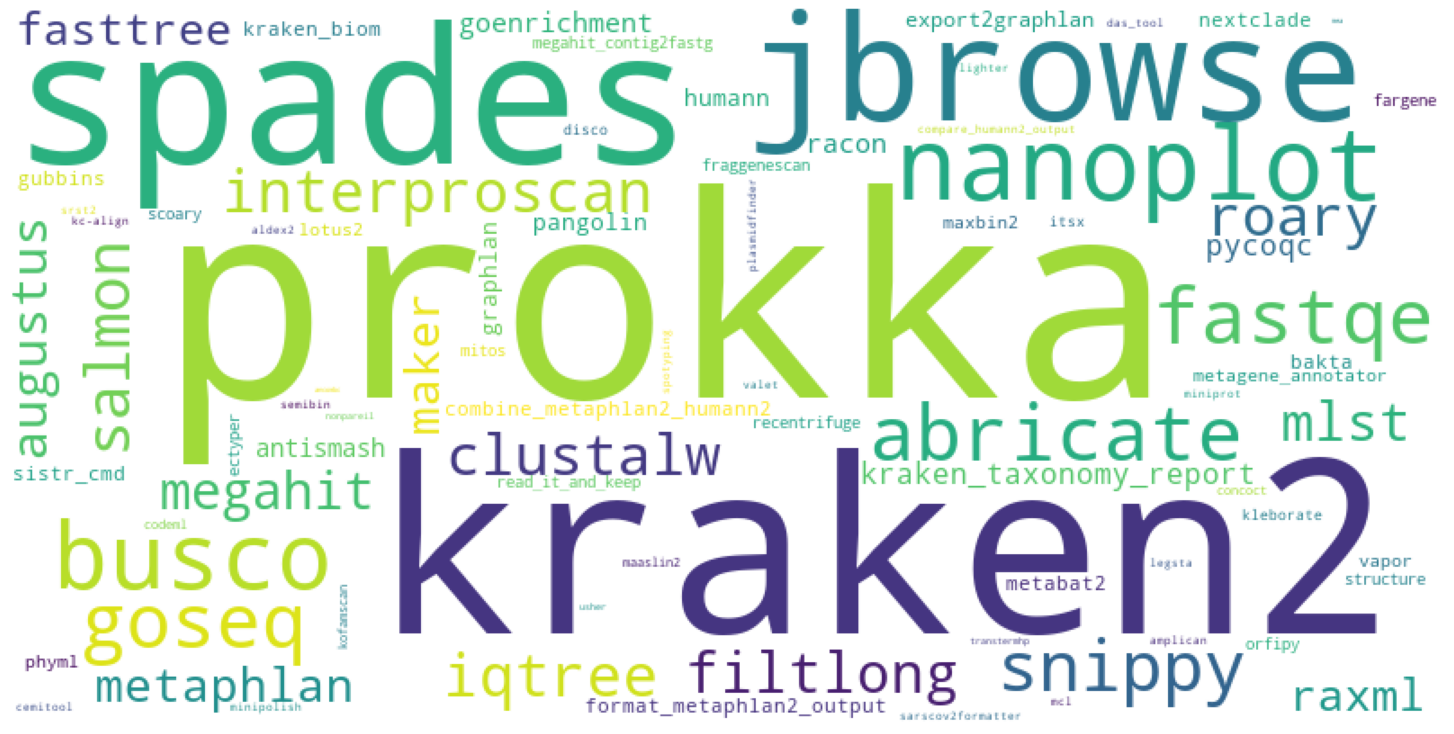

In [25]:

frec = pd.Series(sliced_merged_tool_stats["count"].values,index=sliced_merged_tool_stats["Galaxy wrapper id"]).to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frec)

fig, ax = plt.subplots(figsize = (20,10))
ax.imshow(wordcloud)

plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("../output/wordcloud_microgalaxy.pdf")
plt.savefig("../output/wordcloud_microgalaxy.png")

plt.show()


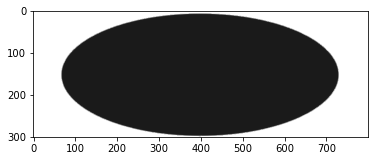

In [26]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("../data/microbial-2.png"))
mask[mask == 0] = 255 #set 0 in array to 255 to work with wordcloud

# from scipy.ndimage.filters import gaussian_filter

# sigma = 1
# mask = gaussian_filter(mask, sigma)

plt.imshow(mask)



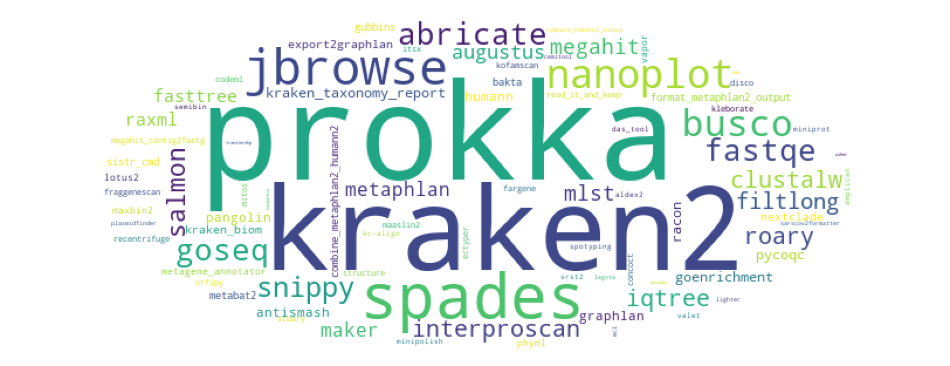

In [27]:

wc = WordCloud(
               mask = mask, 
               background_color = "rgba(255, 255, 255, 0)",
            #    max_words = 2000,
            #    max_font_size = 500,
               #contour_color='darkgreen',
               #contour_width=1, 
               random_state = 42, 
               #repeat=True,
               )
            #    width = mask.shape[1],
            #    height = mask.shape[0])

wc.generate_from_frequencies(frec)

fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(wc)


plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("../output/wordcloud_microgalaxy.pdf")
plt.savefig("../output/wordcloud_microgalaxy.png")

plt.show()